<a href="https://colab.research.google.com/github/antounes/deep-learning-python/blob/main/3_4_classifying_movie_reviews_a_binary_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Movie Reviews: A Binary Classification Example

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gc

# Custom garbage collector callback to include in callbacks list when training models
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    gc.collect()

## The IMBD Dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # Keep only the 10,000 most frequently occurring words in the training data

In [3]:
#train_data[0]
#train_labels[0]

In [4]:
# Let's quickly decode one of the reviews back to English vocabulary

word_index = imdb.get_word_index() # dictionary mapping words to an integer index
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]] # indices offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown"
)

1654784/1641221 [==============================] - 0s 0us/step


In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

In [3]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))  # create and all-zero matrix of shape (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # set specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# Vetorise labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Building the network

In [9]:
# Input data = vectors
# Output data = scalars
# A type of network that performs well on such a problem is a simple stack of fully connected (`Dense`) layers with `relu` activations: `Dense(16, activation='relu')`
# Two intermediate layers with 16 hidden units each with `relu`activation
# A third layer that will output the scalar prediction regarding the sentiment of the current review with `sigmoid` activation (outputs a probability between 0 and 1 indicating
# how likely the sample is to have the target `1`: i.e. how likely the review is to be positive)

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Validating the approach

In [6]:
# Set aside a validation set

x_val, y_val = x_train[:10000], y_train[:10000]
partial_x_train, partial_y_train = x_train[10000:], y_train[10000:]

In [11]:
# Train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors)
# Mini-batches of 512 samples
# Monitor accuracy at the same time on the 10,000 samples set apart by passing the validation data as the `validation_data` argument

history = model.fit(
    partial_x_train, partial_y_train, epochs=20, batch_size=512,  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 44ms/step - loss: 0.5114 - accuracy: 0.7840 - val_loss: 0.4123 - val_accuracy: 0.8389
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3007 - accuracy: 0.9031 - val_loss: 0.3055 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2218 - accuracy: 0.9260 - val_loss: 0.2783 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1729 - accuracy: 0.9428 - val_loss: 0.2741 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1421 - accuracy: 0.9551 - val_loss: 0.3224 - val_accuracy: 0.8716
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1187 - accuracy: 0.9613 - val_loss: 0.2915 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0970 - accuracy: 0.9707 - val_loss: 0.3311 - val_accuracy: 0.8802
Epoch 8/20
30

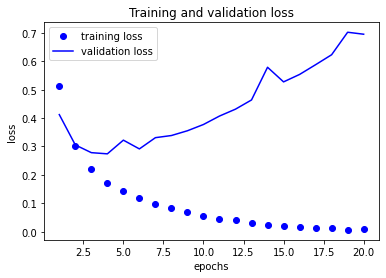

In [12]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='training loss')
plt.plot(epochs, val_loss_values, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

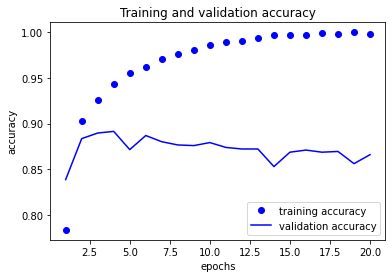

In [13]:
# Plotting the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [14]:
# Retraining a model from scratch

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4550 - accuracy: 0.8196
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2560 - accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1981 - accuracy: 0.9313
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2939 - accuracy: 0.8847


## Using a trained network to generate predicitions on new data

In [15]:
model.predict(x_test)

array([[0.1773597 ],
       [0.9999249 ],
       [0.93531495],
       ...,
       [0.1159542 ],
       [0.06567185],
       [0.5602284 ]], dtype=float32)

## Further experiments

In [16]:
# Try using one or three hidden layers, and see how doing so affects validation and test accuracy

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4421 - accuracy: 0.8245 - val_loss: 0.2969 - val_accuracy: 0.9157
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2716 - accuracy: 0.9095 - val_loss: 0.2218 - val_accuracy: 0.9287
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2154 - accuracy: 0.9284 - val_loss: 0.1783 - val_accuracy: 0.9452
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2820 - accuracy: 0.8872


In [7]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 32ms/step - loss: 0.4394 - accuracy: 0.8178 - val_loss: 0.3767 - val_accuracy: 0.8388
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2439 - accuracy: 0.9109 - val_loss: 0.1725 - val_accuracy: 0.9439
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1915 - accuracy: 0.9303 - val_loss: 0.1421 - val_accuracy: 0.9527
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3133 - accuracy: 0.8806


In [12]:
# Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, callbacks=[GarbageCollectorCallback()])
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 30ms/step - loss: 0.4532 - accuracy: 0.8151
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2469 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1919 - accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3138 - accuracy: 0.8780


In [13]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, callbacks=[GarbageCollectorCallback()])
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4149 - accuracy: 0.8184
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2373 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.1816 - accuracy: 0.9313
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3269 - accuracy: 0.8766


In [15]:
# Try using the `mse` loss function instead of `binary_crossentropy``

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, callbacks=[GarbageCollectorCallback()])
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.1547 - accuracy: 0.8135
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0794 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0586 - accuracy: 0.9316
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0866 - accuracy: 0.8840


In [16]:
# Try using the `tanh` activation instead of `relu``

model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(10000,)),
     tf.keras.layers.Dense(16, activation='tanh'),
     tf.keras.layers.Dense(16, activation='tanh'),
     tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, callbacks=[GarbageCollectorCallback()])
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.4224 - accuracy: 0.8304
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2331 - accuracy: 0.9152
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1776 - accuracy: 0.9355
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3241 - accuracy: 0.8767
